<a href="https://colab.research.google.com/github/Laviniamadeira/TelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>📌 Extracão </h1>


In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [265]:
# importando a base de dados e a leitura do Json
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
dados = pd.read_json(url)

In [266]:
# Faz a normalização (expande as colunas com dicionários)
dados_normalizados = pd.concat([
    dados.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    pd.json_normalize(dados['customer']),
    pd.json_normalize(dados['phone']),
    pd.json_normalize(dados['internet']),
    pd.json_normalize(dados['account'])
], axis=1)

#salvando em um csv o dados limpos
dados_normalizados.to_csv("dados_limpos.csv", index=False)

In [267]:
# Criando dataframe principal
df = pd.DataFrame(dados_normalizados)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformação (T - Transform)

In [269]:
# Convertendo colunas Yes e No para 0 e 1
colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Churn','OnlineBackup','Charges.Total']

df[colunas_binarias] = df[colunas_binarias].replace({'Yes': 1, 'No': 0})
df[colunas_binarias] = df[colunas_binarias].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)


/tmp/ipython-input-1163780621.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colunas_binarias] = df[colunas_binarias].replace({'Yes': 1, 'No': 0})


In [270]:
# Convertendo a coluna 'gender' para 0 e 1
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})

/tmp/ipython-input-418299944.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})


In [271]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267


In [272]:
# Conversao do tipo da coluna
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan).astype(float)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


##Verificando Inconsistências nos Dados

In [274]:
# Limpando nome das colunas
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '_')
display(df.head())

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.0
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0


In [275]:
# dados_normalizados['gender'].value_counts()

In [276]:
#Criando uma nova coluna para faturamento mensal
df['contas_diarias'] = df['charges_monthly'] / 30
display(df.head())

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.0,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0,2.796667


In [277]:
# Salvando CSV final
df.to_csv("dados_limpos_alterado.csv", index=False)
print("Salvei os dados limpos no arquivo 'dados_limpos_alterado.csv'")

Salvei os dados limpos no arquivo 'dados_limpos_alterado.csv'


#📊 Carga e Análise (L - Load & Analysis)

In [278]:
print(df.describe())

             churn       gender  seniorcitizen      partner   dependents  \
count  7267.000000  7267.000000    7267.000000  7267.000000  7267.000000   
mean      0.257190     0.505711       0.162653     0.484106     0.300124   
std       0.437115     0.500002       0.369074     0.499782     0.458343   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     1.000000       0.000000     0.000000     0.000000   
75%       1.000000     1.000000       0.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  phoneservice  multiplelines  onlinebackup  \
count  7267.000000   7267.000000    7267.000000   7267.000000   
mean     32.346498      0.902711       0.421770      0.344571   
std      24.571773      0.296371       0.493876      0.475261   
min       0.000000      0.000000       0.000000      0.

In [279]:
# Distribuição do churn
churn_counts = df['churn'].value_counts()
churn_pct = df['churn'].value_counts(normalize=True) * 100

print(f"\n📊 Distribuição do Churn:")
print(f"• Clientes ativos (0): {churn_counts[0]:,} ({churn_pct[0]:.2f}%)")
print(f"• Clientes que cancelaram (1): {churn_counts[1]:,} ({churn_pct[1]:.2f}%)")


📊 Distribuição do Churn:
• Clientes ativos (0): 5,398 (74.28%)
• Clientes que cancelaram (1): 1,869 (25.72%)


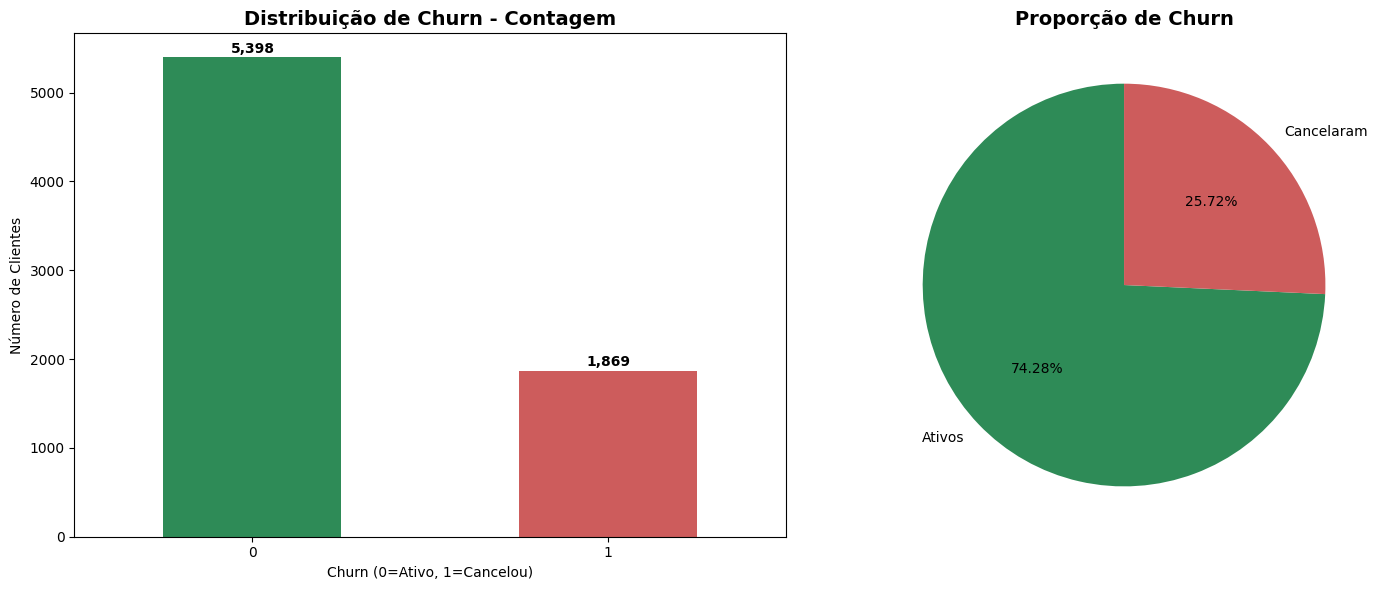

In [280]:
# Visualização da distribuição do churn
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
churn_counts.plot(kind='bar', ax=axes[0], color=['#2E8B57', '#CD5C5C'])
axes[0].set_title('Distribuição de Churn - Contagem', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn (0=Ativo, 1=Cancelou)')
axes[0].set_ylabel('Número de Clientes')
axes[0].tick_params(axis='x', rotation=0)

# Adicionar valores nas barras
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

# Gráfico de pizza
wedges, texts, autotexts = axes[1].pie(churn_counts.values,
                                      labels=['Ativos', 'Cancelaram'],
                                      autopct='%1.2f%%',
                                      colors=['#2E8B57', '#CD5C5C'],
                                      startangle=90)
axes[1].set_title('Proporção de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [281]:
# Variáveis categóricas para analisar
categorical_vars = ['gender', 'seniorcitizen', 'partner', 'dependents',
                   'phoneservice', 'multiplelines', 'internetservice',
                   'onlinesecurity', 'onlinebackup', 'deviceprotection',
                   'techsupport', 'streamingtv', 'streamingmovies',
                   'contract', 'paperlessbilling', 'paymentmethod']

# Função para analisar churn por categoria
def analyze_churn_by_category(df, column):
    if column in ['gender', 'internetservice', 'cont  ract', 'paymentmethod']:
        # Para variáveis categóricas não binárias
        cross_tab = pd.crosstab(df[column], df['churn'])
        churn_rate = pd.crosstab(df[column], df['churn'], normalize='index') * 100
    else:
        # Para variáveis binárias
        cross_tab = pd.crosstab(df[column], df['churn'])
        churn_rate = pd.crosstab(df[column], df['churn'], normalize='index') * 100

    print(f"\n📈 Análise de {column.upper()}:")
    print("Contagem:")
    print(cross_tab)
    print("\nTaxa de Churn (%):")
    print(churn_rate.round(2))

    return cross_tab, churn_rate


📈 Análise de CONTRACT:
Contagem:
churn              0     1
contract                  
Month-to-month  2350  1655
One year        1353   166
Two year        1695    48

Taxa de Churn (%):
churn               0      1
contract                    
Month-to-month  58.68  41.32
One year        89.07  10.93
Two year        97.25   2.75

📈 Análise de PAYMENTMETHOD:
Contagem:
churn                         0     1
paymentmethod                        
Bank transfer (automatic)  1331   258
Credit card (automatic)    1336   232
Electronic check           1374  1071
Mailed check               1357   308

Taxa de Churn (%):
churn                          0      1
paymentmethod                          
Bank transfer (automatic)  83.76  16.24
Credit card (automatic)    85.20  14.80
Electronic check           56.20  43.80
Mailed check               81.50  18.50

📈 Análise de INTERNETSERVICE:
Contagem:
churn               0     1
internetservice            
DSL              2029   459
Fiber optic   

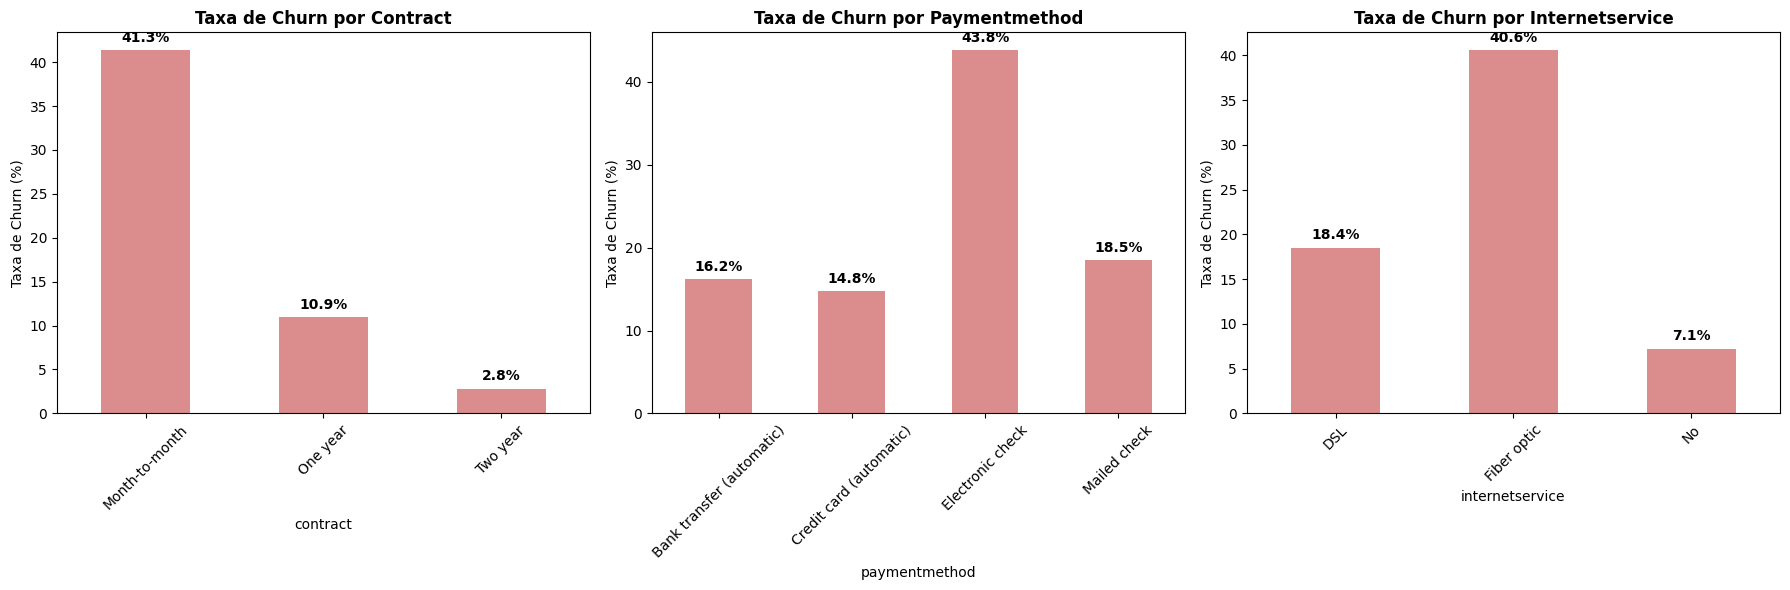

In [282]:
# Analisar as principais variáveis categóricas - APENAS AS MAIS IMPORTANTES
key_vars = ['contract', 'paymentmethod', 'internetservice']  # Reduzido para 3 principais

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Uma linha só

for i, var in enumerate(key_vars):
    cross_tab, churn_rate = analyze_churn_by_category(df, var)

    # Plotar taxa de churn
    churn_rate[1].plot(kind='bar', ax=axes[i], color='#CD5C5C', alpha=0.7)
    axes[i].set_title(f'Taxa de Churn por {var.title()}', fontweight='bold')
    axes[i].set_ylabel('Taxa de Churn (%)')
    axes[i].tick_params(axis='x', rotation=45)

    # Adicionar valores nas barras
    for j, v in enumerate(churn_rate[1].values):
        axes[i].text(j, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


📈 Estatísticas por Grupo de Churn:

TENURE:
        count   mean    std  min   25%   50%   75%   max
churn                                                   
0      5398.0  37.32  24.18  0.0  14.0  37.0  61.0  72.0
1      1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0

CHARGES_MONTHLY:
        count   mean    std    min    25%    50%    75%     max
churn                                                          
0      5398.0  61.35  31.11  18.25  25.10  64.50  88.64  118.75
1      1869.0  74.44  24.67  18.85  56.15  79.65  94.20  118.35

CHARGES_TOTAL:
        count     mean      std   min    25%     50%      75%     max
churn                                                                
0      5398.0  2534.80  2330.80   0.0  564.0  1663.0  4236.75  8672.0
1      1869.0  1531.32  1890.82  18.0  134.0   703.0  2331.00  8684.0


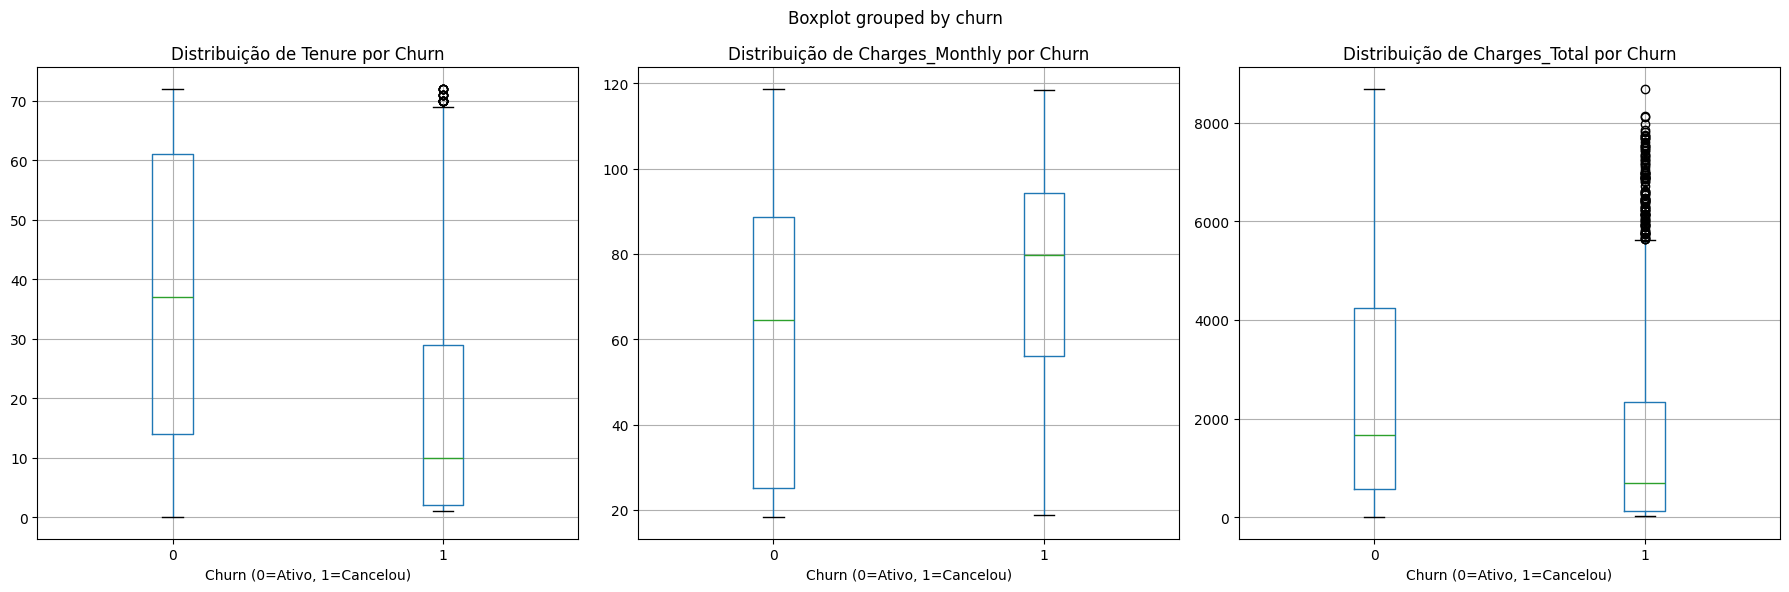

In [283]:
# Variáveis numéricas para analisar
numeric_vars = ['tenure', 'charges_monthly', 'charges_total']

# Análise estatística por grupo de churn
print("\n📈 Estatísticas por Grupo de Churn:")
for var in numeric_vars:
    print(f"\n{var.upper()}:")
    grouped = df.groupby('churn')[var].describe().round(2)
    print(grouped)

# Visualizações das variáveis numéricas - APENAS BOXPLOTS (mais limpo)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Apenas Boxplots - mais informativos
for i, var in enumerate(numeric_vars):
    df.boxplot(column=var, by='churn', ax=axes[i])
    axes[i].set_title(f'Distribuição de {var.title()} por Churn')
    axes[i].set_xlabel('Churn (0=Ativo, 1=Cancelou)')

plt.tight_layout()
plt.show()


📊 Correlações com Churn (ordenadas por magnitude):
churn               1.000
tenure             -0.344
charges_total      -0.193
contas_diarias      0.190
charges_monthly     0.190
paperlessbilling    0.187
dependents         -0.161
techsupport        -0.160
partner            -0.149
seniorcitizen       0.147
onlinebackup       -0.080
deviceprotection   -0.063
streamingtv         0.062
streamingmovies     0.061
multiplelines       0.039
phoneservice        0.013
gender             -0.010
Name: churn, dtype: float64


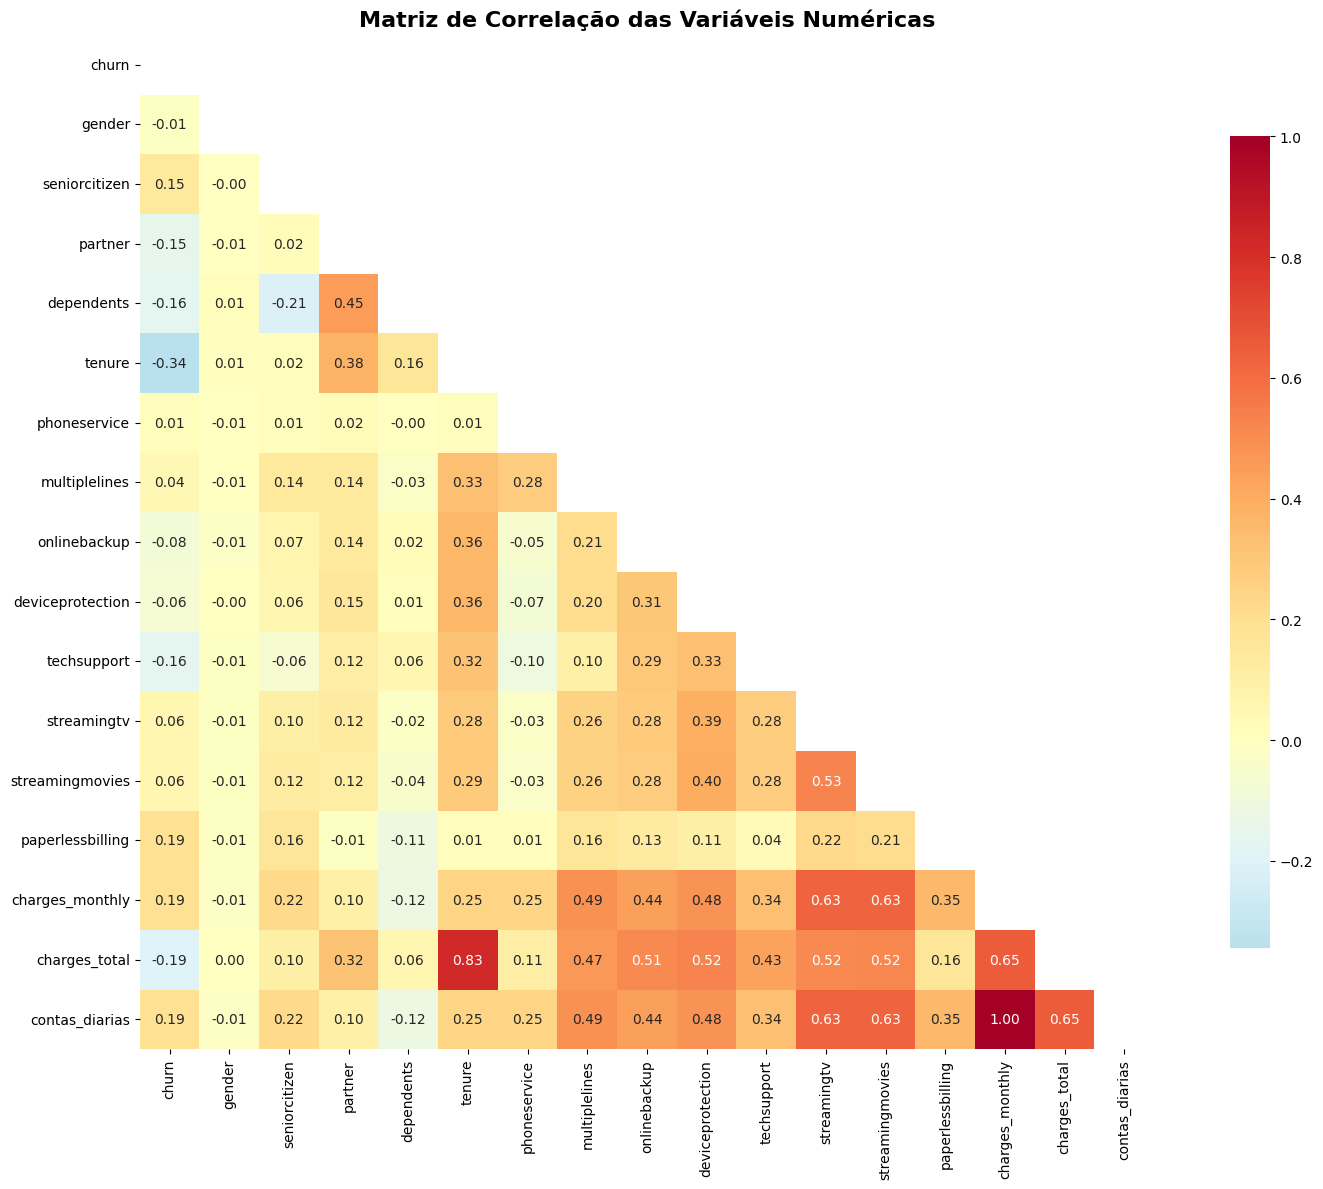

In [284]:
# Matriz de correlação
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Correlações com churn
churn_correlations = correlation_matrix['churn'].sort_values(key=abs, ascending=False)
print("\n📊 Correlações com Churn (ordenadas por magnitude):")
print(churn_correlations.round(3))

# Heatmap de correlação
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdYlBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [285]:
# Calcular insights automáticos
insights = []

# Taxa geral de churn
churn_rate = df['churn'].mean() * 100
insights.append(f"• Taxa geral de churn: {churn_rate:.2f}%")

# Análise por contrato
contract_churn = df.groupby('contract')['churn'].mean() * 100
worst_contract = contract_churn.idxmax()
insights.append(f"• Pior tipo de contrato: {worst_contract} ({contract_churn[worst_contract]:.2f}% churn)")

# Análise por método de pagamento
payment_churn = df.groupby('paymentmethod')['churn'].mean() * 100
worst_payment = payment_churn.idxmax()
insights.append(f"• Pior método de pagamento: {worst_payment} ({payment_churn[worst_payment]:.2f}% churn)")

# Análise por tenure
low_tenure_churn = df[df['tenure'] <= 12]['churn'].mean() * 100
high_tenure_churn = df[df['tenure'] > 12]['churn'].mean() * 100
insights.append(f"• Churn clientes novos (≤12 meses): {low_tenure_churn:.2f}%")
insights.append(f"• Churn clientes antigos (>12 meses): {high_tenure_churn:.2f}%")

# Análise por valor da conta
high_value_churn = df[df['charges_monthly'] > df['charges_monthly'].quantile(0.75)]['churn'].mean() * 100
low_value_churn = df[df['charges_monthly'] <= df['charges_monthly'].quantile(0.25)]['churn'].mean() * 100
insights.append(f"• Churn clientes alto valor: {high_value_churn:.2f}%")
insights.append(f"• Churn clientes baixo valor: {low_value_churn:.2f}%")


In [286]:
print("\n🔍 INSIGHTS AUTOMATIZADOS:")
for insight in insights:
    print(insight)


🔍 INSIGHTS AUTOMATIZADOS:
• Taxa geral de churn: 25.72%
• Pior tipo de contrato: Month-to-month (41.32% churn)
• Pior método de pagamento: Electronic check (43.80% churn)
• Churn clientes novos (≤12 meses): 45.78%
• Churn clientes antigos (>12 meses): 16.63%
• Churn clientes alto valor: 31.81%
• Churn clientes baixo valor: 10.79%
